Import simulator and utilities

In [28]:
from Tfdtd.fdtd import FDTD2D
from Tfdtd.utilities import print_setup_info
from Tfdtd.detectors import PointDetector
from Tfdtd.sources import PointSource, LineSource

from Tfdtd.geometries import Rectangle, Circle

from Tfdtd.viz import viz2D,viz_detector

In [29]:
print('nx',16e-6/50e-9)
print('ny',8e-6/50e-9)


nx 320.0
ny 160.0


In [52]:
params = {
    'backend': 'pytorch',
    'precision': 'float64',
    'nx': 320,
    'ny': 160,
    'time_steps': 10000,
    'dx': 50e-9,
    'dy': 50e-9,
    'polarization': 'TM',
    'use_pml': True,
    'pml_thickness': 20,
}

### Testing initializations

In [71]:
sim = FDTD2D(params = params)

Reading configuration from dictionary...


### Set geometry

In [54]:
print('wave guide width', 1e-6/sim.dx)

wave guide width 20.0


In [72]:
rectangle = Rectangle(x1=0, y1=70, x2=sim.nx, y2=90,epsr=12, sigma=0)
sim.add_geometry(rectangle)
sim.update_geometry()

### Set sources

In [56]:
import numpy as np
f  = 0.5e14
c = 3e8
w = 2*3.14*f/c
print(w)
print(np.format_float_scientific((3.0e8) / np.sqrt(12)/(2*1e-6), unique=False, precision=2))
print('speed of light in material',(3.0e8) / np.sqrt(12))

1046666.6666666666
4.33e+13
speed of light in material 86602540.37844387


In [67]:
source_params ={
    'function': 'sinusoidal',
    'source_type': 'line_source',
    'frequency': 5e13,
    'x': 30,
    'y1': 72,
    'y2': 88
}
line_source = LineSource(source_params)
sim.add_source(line_source)

In [73]:
source_params_gaussian = {
    'source_type': 'point_source',  # Add 'source_type' key
    'function': 'gaussian_pulse',
    'source_x': 40,
    'source_y': 80,
    'amplitude': 1.0,
    't0': 0, # t0 is expressed in unit of time not time steps
    'frequency_center': 0.5e14,
    'frequency_width': 0.2e14
}

gaussian_source = PointSource(source_params_gaussian)
sim.add_source(gaussian_source)

### Add detector

In [74]:
detector_params = {
    'name': 'detector1',
    'position': (250, 85),
}
point_detector = PointDetector(detector_params)
sim.add_detector(point_detector)

### Print simulation info

In [75]:
print_setup_info(sim)

Simulation setup information:
nx: 320
ny: 160
time_steps: 10000
dx: 5e-08
dy: 5e-08
dt: 1.179327168374842e-16
use_pml: True
pml_thickness: 20
c: 299792458
epsilon_0: 8.85418782e-12
mu_0: 1.25663706e-06
Source 0: source_type: point_source, function: gaussian_pulse, source_x: 40, source_y: 80, amplitude: 1.0, t0: 0, frequency center: 50000000000000.0, frequency width: 20000000000000.0
Detector 0: Detector: detector1, Position: (250, 85)


### Show material distribution

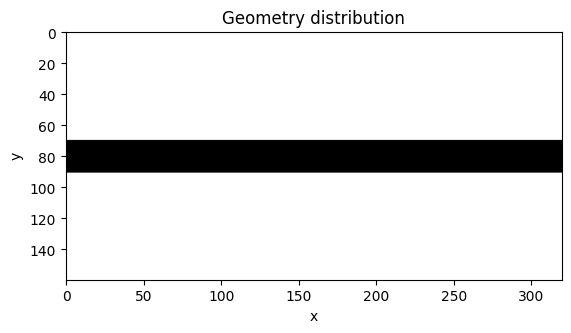

In [76]:
# Visualize permittivity distribution
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(np.transpose(sim.eps_r), cmap='binary')
plt.title('Geometry distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Simulate

In [77]:
sim.run()

100%|██████████| 10000/10000 [00:17<00:00, 561.98it/s]


### Visualize fields

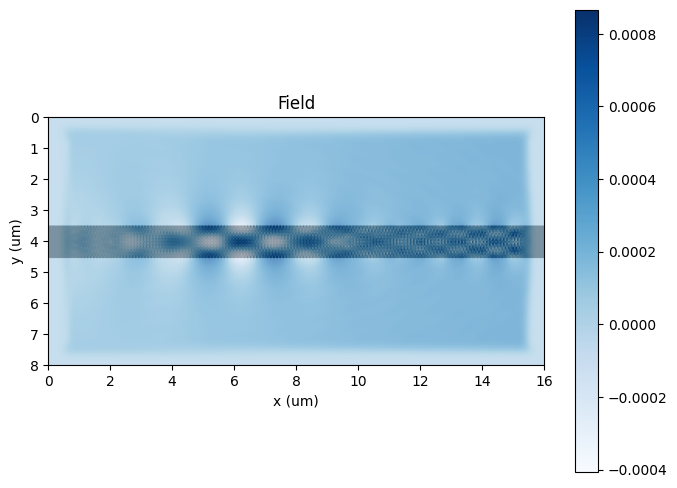

In [78]:
viz2D(sim, sim.e_field[:,:,2])

### Visualize detector

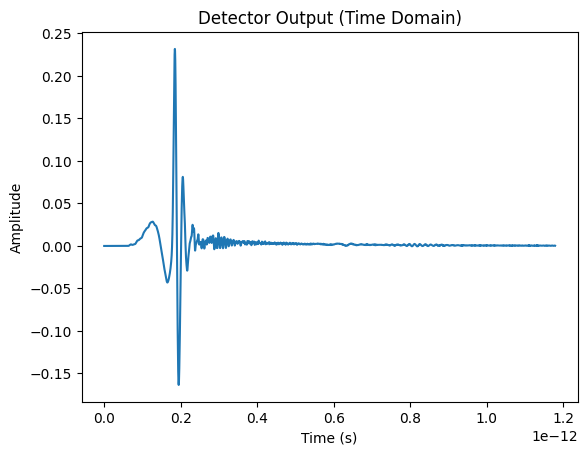

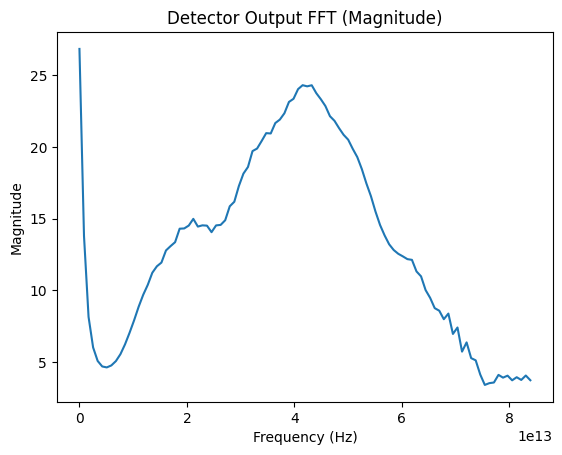

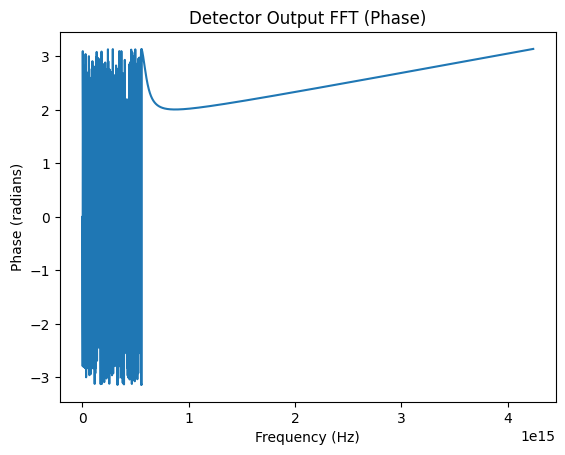

In [79]:
viz_detector(sim,point_detector)